In [1]:
# My Modules
import wrangle_zillow as wr
import explore_zillow as ex

# Imports
import env
import os

# Numbers
import pandas as pd 
import numpy as np

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

Load in successful, awaiting commands...


> # Wrangle

In [2]:
df = wr.get_zillow_261()
df.head()

CSV file found and loaded


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,parcelid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0,10759547
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11193347
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11215747
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0,11229347
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0,11324547


In [3]:
df_clean = wr.wrangle_zillow(df)
df_clean.head()

Returning Zillow's Single Family Residential Homes from 2017
--------------------------------------------
Renamed columns for ease of use
NaN's removed - Percent Original Data Remaining: 99.0
Moved target column to index 0 for ease of assignment
Bed and year data types changed from float to integer
Changed FIPS code to actual county name
Outliers removed from Sqft < 25,000 and Assessed Worth > 95th quantile


,assessed_worth,bed,bath,sqft,year,property_taxes,county_Orange,county_Ventura
4,296425.0,4,2.0,3633.0,2005,6941.39,0,0
6,847770.0,3,4.0,1620.0,2011,10244.94,0,0
7,646760.0,3,2.0,2077.0,1926,7924.68,0,0
11,5328.0,0,0.0,1200.0,1972,91.60,0,0
14,6920.0,0,0.0,171.0,1973,255.17,0,0


In [4]:
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (2033172, 8)
Train: (1219902, 8)
Validate: (406635, 8)
Test: (406635, 8)


In [5]:
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,county_Orange,county_Ventura
1571798,885000.0,4,2.5,2987.0,2006,13617.38,1,0
1723553,489511.0,3,2.0,3013.0,1977,5768.57,0,0
718174,390915.0,4,3.0,2572.0,1986,4944.11,0,0
1663205,321758.0,3,1.0,1589.0,1959,4031.78,0,0
1087891,231737.0,3,2.0,1727.0,1962,2708.80,0,1


> # Scaling

I have removed outliers and will utilize the linear scaling options of MinMax and Standard.

In [6]:
from scipy import stats
import sklearn.preprocessing

In [7]:
X_train, y_train, X_validate, y_validate, X_test, y_test = ex.x_y_train_validate_test(train, validate, test, 'assessed_worth')

Verifying number of features and target:
Train: (8, 1)
Validate: (8, 1)
Test: (8, 1)


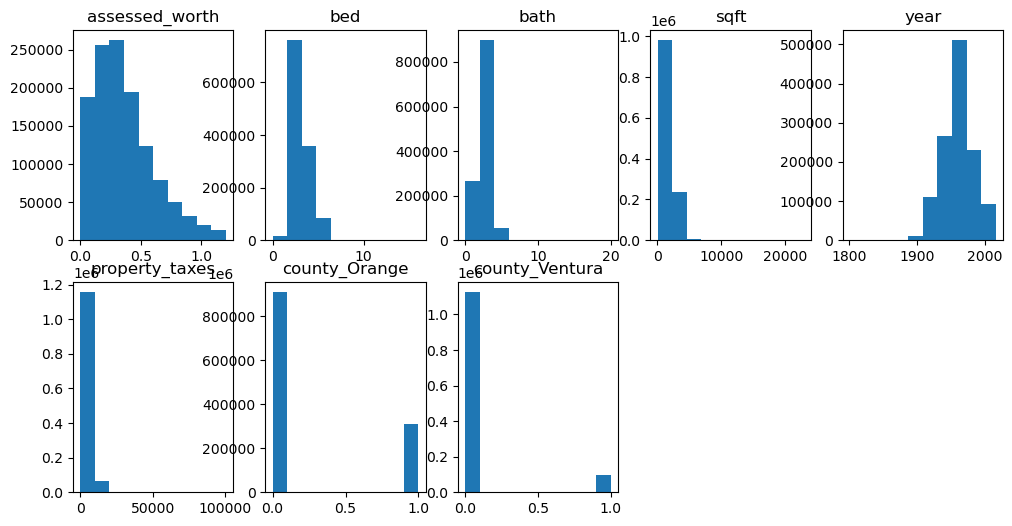

In [8]:
# NOT scaled
ex.hist_zillow(train)

> MinMax Scaler

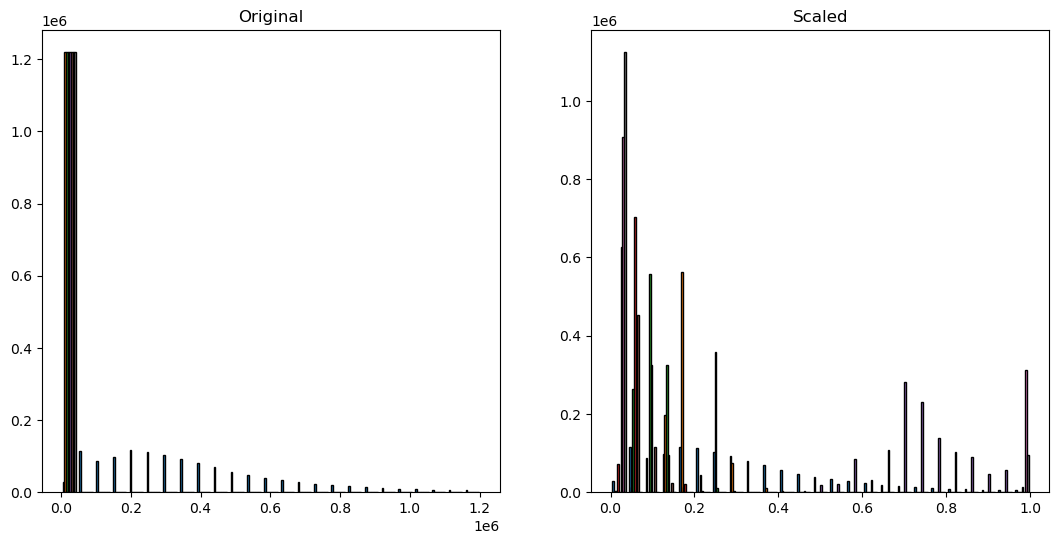

In [9]:
minmaxscaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
X_train_scaled_mm = minmaxscaler.fit_transform(X_train)
X_validate_scaled_mm = minmaxscaler.transform(X_validate)
X_test_scaled_mm = minmaxscaler.transform(X_test)

# visualizing original and X_train scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled_mm, bins=25, ec='black')
plt.title('Scaled')
plt.show()

> Standard Scaler

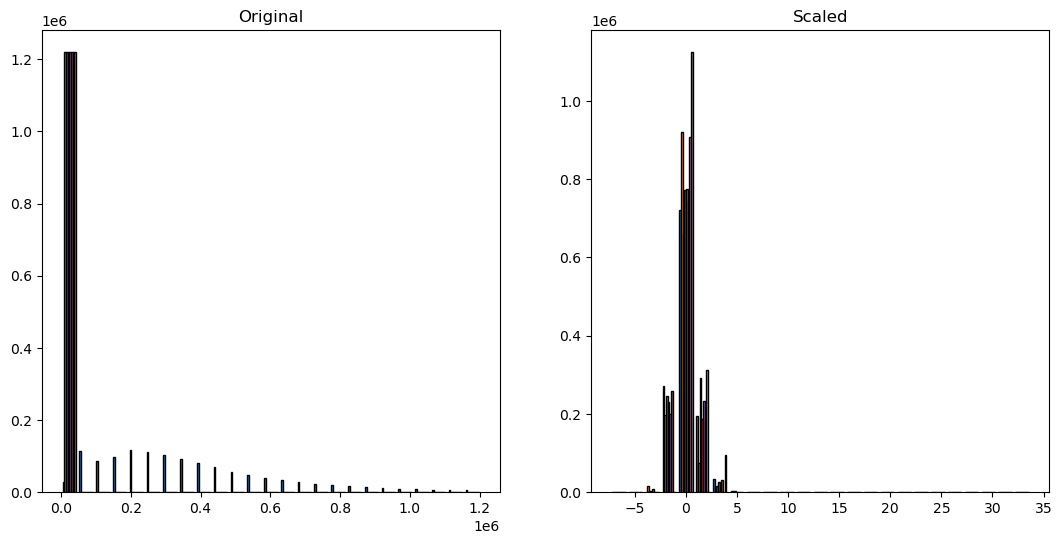

In [10]:
standardscaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

standardscaler.fit(X_train)

X_train_scaled_st = standardscaler.transform(X_train)
X_validate_scaled_st = standardscaler.transform(X_validate)
X_test_scaled_st = standardscaler.transform(X_test)

# visualize
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled_st, bins=25, ec='black')
plt.title('Scaled')
plt.show()

> Robust Scaler (for giggles)

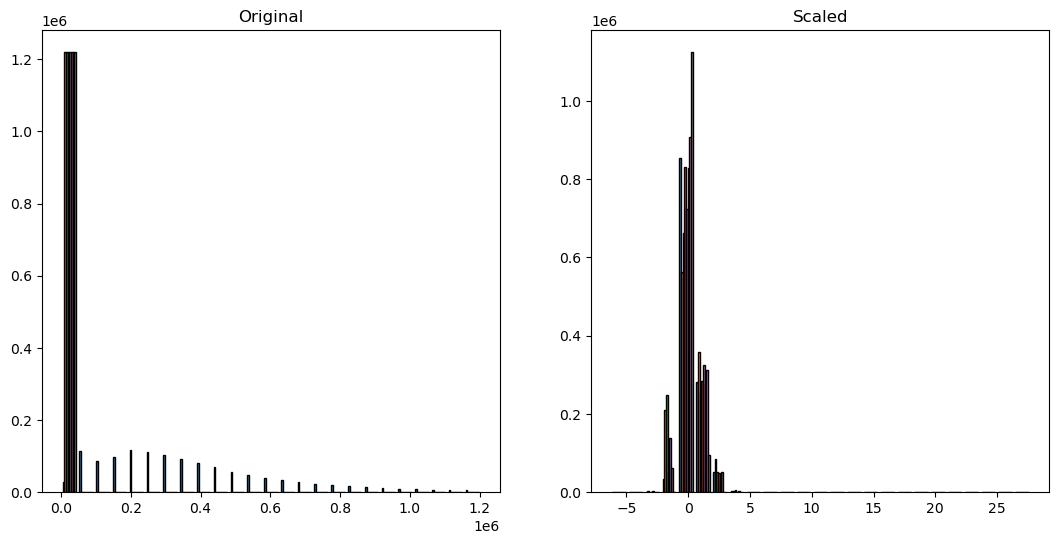

In [11]:
robustscaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

robustscaler.fit(X_train)

X_train_scaled_ro = robustscaler.transform(X_train)
X_validate_scaled_ro = robustscaler.transform(X_validate)
X_test_scaled_ro = robustscaler.transform(X_test)

# visualize
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled_ro, bins=25, ec='black')
plt.title('Scaled')
plt.show()

> Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

MinMax Scaler Back

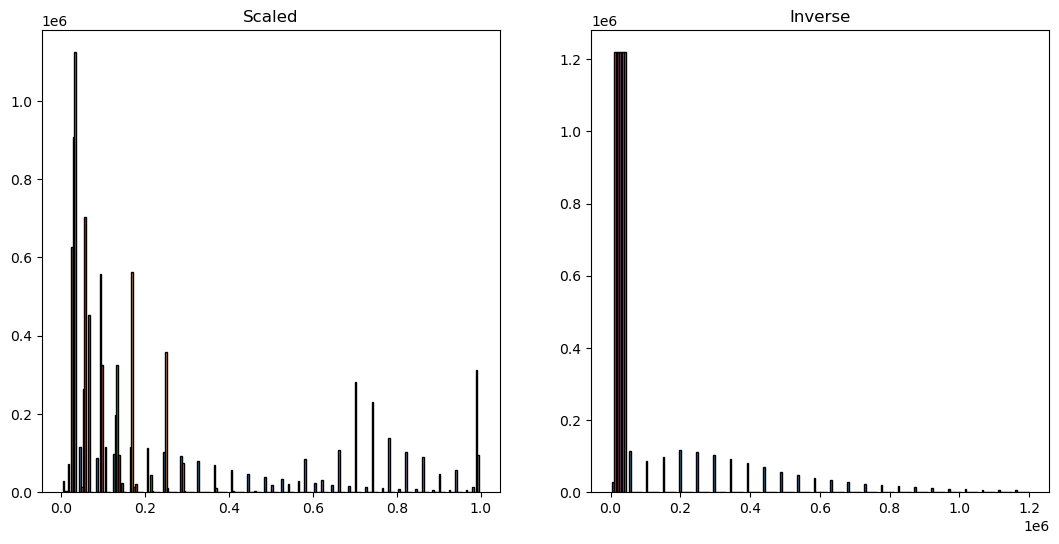

In [12]:
minmaxscaler_back = minmaxscaler.inverse_transform(X_train_scaled_mm)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train_scaled_mm, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(122)
plt.hist(minmaxscaler_back, bins=25, ec='black')
plt.title('Inverse')
plt.show()

> Standard Scaler Back

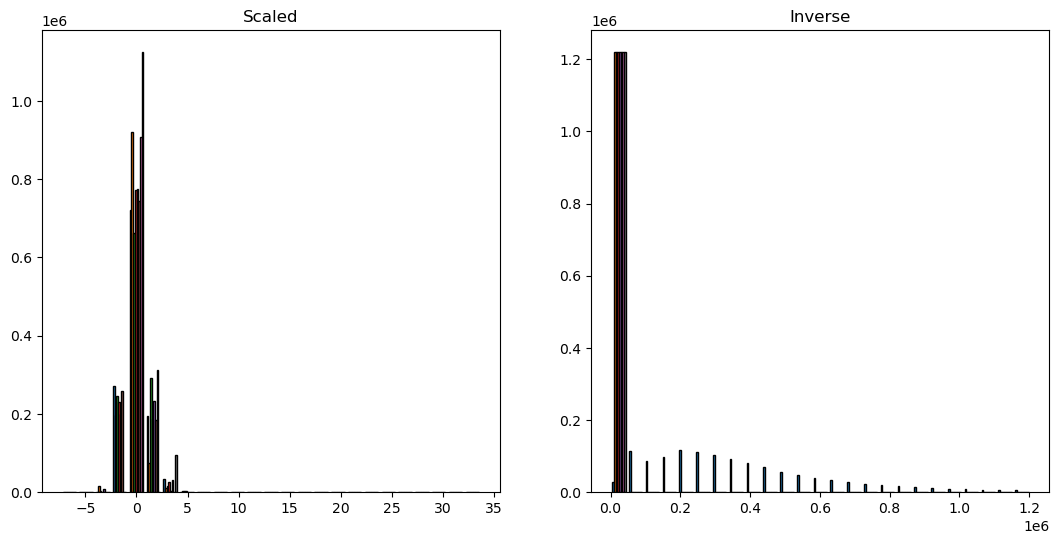

In [13]:
standardscaler_back = standardscaler.inverse_transform(X_train_scaled_st)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train_scaled_st, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(122)
plt.hist(standardscaler_back, bins=25, ec='black')
plt.title('Inverse')
plt.show()

> Robust Scaler Back

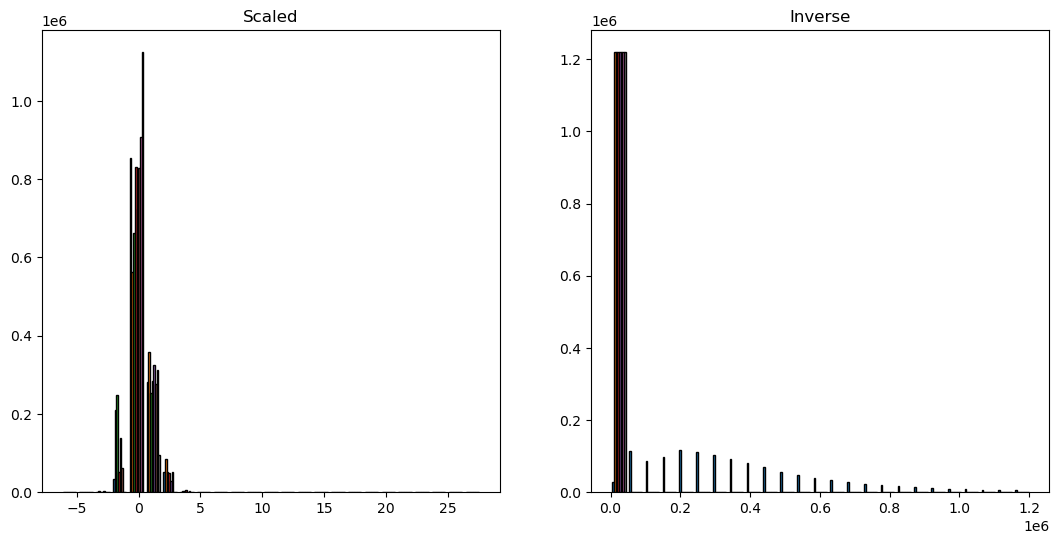

In [14]:
robustscaler_back = robustscaler.inverse_transform(X_train_scaled_ro)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train_scaled_ro, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(122)
plt.hist(robustscaler_back, bins=25, ec='black')
plt.title('Inverse')
plt.show()

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

* changes the shape to a normal distribution
* handles marginal outliers

* maps each feature independently and then maps overall keeping in mind the output distribution. 
* non-linear transformation

In [15]:
# import
from sklearn.preprocessing import QuantileTransformer

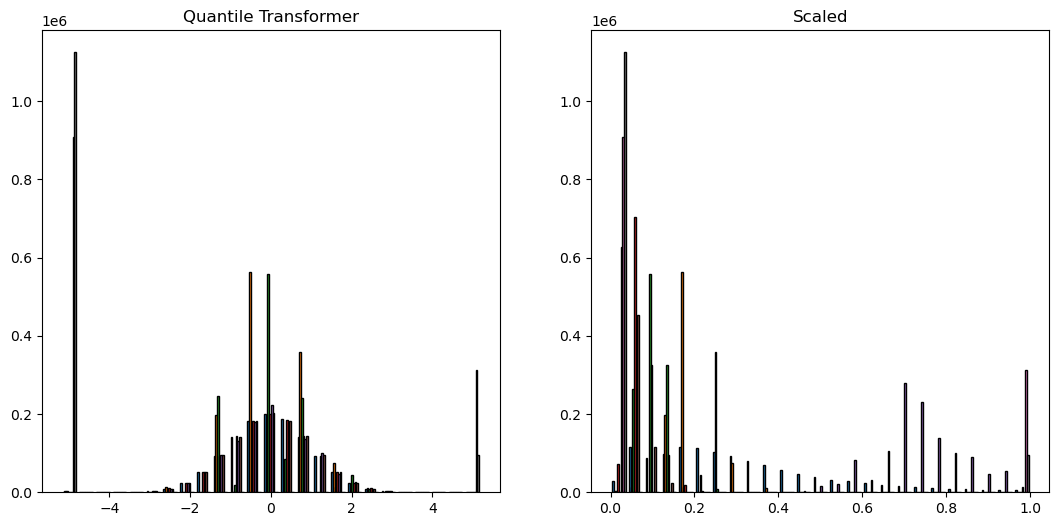

In [17]:
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
X_train_qt = quantile.fit_transform(X_train)

# histogram of the transformed data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train_qt, bins=25, ec='black')
plt.title('Quantile Transformer')
plt.subplot(122)
plt.hist(X_train_scaled_mm, bins=25, ec='black')
plt.title('Scaled')
plt.show()

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

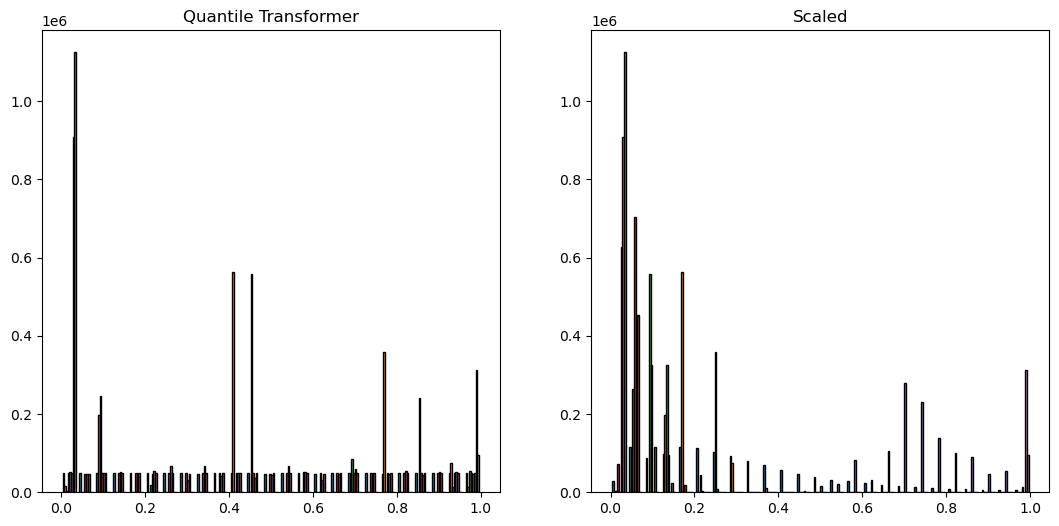

In [18]:
# quantile transform the raw data
quantile = QuantileTransformer()
X_train_qt2 = quantile.fit_transform(X_train)

# histogram of the transformed data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train_qt2, bins=25, ec='black')
plt.title('Quantile Transformer')
plt.subplot(122)
plt.hist(X_train_scaled_mm, bins=25, ec='black')
plt.title('Scaled')
plt.show()

The data is not normalized anymore, it is simply scaled. The normal distribution part of the function must perform the steps of centering by subtracting the mean from each value and then dividing by the standard devation to acheive a std of 1.. neat.

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
* I only have a wrangle, so the function will be contained in that file

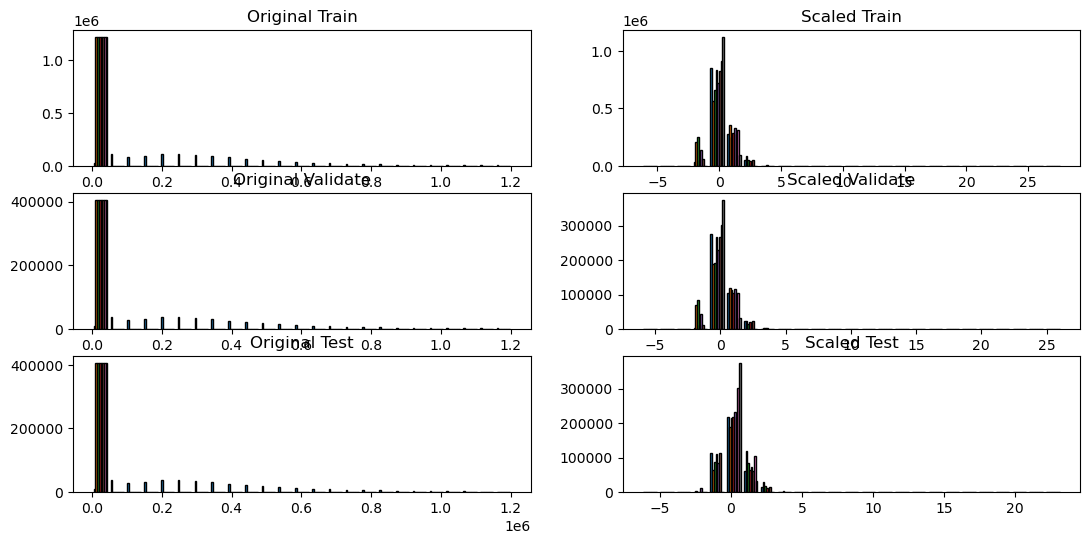

In [19]:
wr.scale_zillow(X_train, X_validate, X_test)